In [194]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

In [195]:
orders = pd.read_csv("Orders.csv")
returns = pd.read_csv("Returns.csv")

In [196]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [197]:
returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [198]:
# transforming type of data in column Sales and Profit
type(orders["Profit"])

pandas.core.series.Series

In [199]:
type(orders["Sales"])

pandas.core.series.Series

In [200]:
orders["Profit"]

0          $62.15
1        -$288.77
2         $919.97
3         -$96.54
4         $311.52
           ...   
51285       $4.50
51286       $3.34
51287       $2.48
51288       $2.40
51289       $1.80
Name: Profit, Length: 51290, dtype: object

In [201]:
orders.Sales = orders.Sales.str.replace('$','')
orders.Sales =orders.Sales.str.replace(',','')
orders['Sales'] = orders['Sales'].astype(float)

orders.Profit = orders.Profit.str.replace('$','')
orders.Profit =orders.Profit.str.replace(',','')
orders.Profit = orders.Profit.astype(float)

C:\Users\FRANCE~1\AppData\Local\Temp/ipykernel_28204/2862219031.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\FRANCE~1\AppData\Local\Temp/ipykernel_28204/2862219031.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [202]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [203]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')

In [204]:
orders['Month'] = orders['Order.Date'].dt.month 

In [205]:
orders['Year'] = orders['Order.Date'].dt.year

Text(0.5, 0, 'Date')

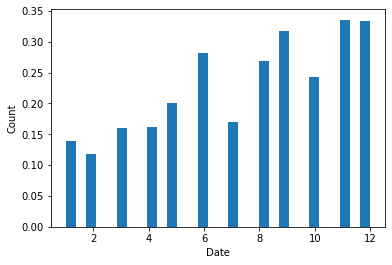

In [206]:
#month trend
plt.hist(orders['Month'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

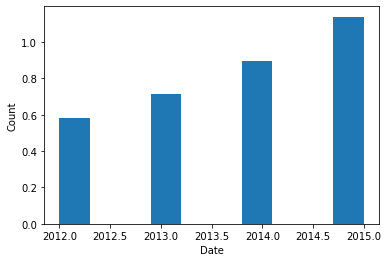

In [207]:
#years trend
plt.hist(orders['Year'], density=True)
plt.ylabel('Count')
plt.xlabel('Date')

In [208]:
season2=orders.groupby(['Month','Category']).sum().reset_index()
px.bar(season2, x = 'Month',y = 'Quantity',facet_col="Category")

In [209]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [210]:
combined = orders.merge(returns, left_on = 'Order.ID', right_on= 'Order ID', how = "left")

In [211]:
combined.drop(["Order ID"], axis = 1, inplace = True)

In [212]:
combined

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.770,High,11,2014,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.630,Critical,2,2014,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.490,Medium,10,2014,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.160,Medium,1,2014,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.040,Critical,11,2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,65.10,5,0.0,4.50,1.010,Medium,6,2015,NaN,NaN
51286,34337,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,16.72,5,0.2,3.34,1.930,High,5,2014,NaN,NaN
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,8.56,2,0.0,2.48,1.580,High,8,2012,NaN,NaN
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,13.44,2,0.0,2.40,1.003,Medium,2,2013,NaN,NaN


In [213]:
combined["Returned"].fillna("No", inplace = True)

In [214]:
combined.groupby(['Year', 'Returned'])['Profit'].sum()

Year  Returned
2012  No          231463.09
      Yes          17477.26
2013  No          298145.44
      Yes           9269.89
2014  No          389424.26
      Yes          17510.63
2015  No          487053.13
      Yes          17112.97
Name: Profit, dtype: float64

In [215]:
(combined[combined['Returned'] == 'Yes']['Customer.ID'].value_counts()>1).sum()

547

In [216]:
(combined[combined['Returned'] == 'Yes']['Customer.ID'].value_counts()>5).sum()

46

In [217]:
combined.groupby('Category')['Returned'].value_counts()

Category         Returned
Furniture        No           9433
                 Yes           427
Office Supplies  No          29941
                 Yes          1348
Technology       No           9696
                 Yes           445
Name: Returned, dtype: int64

In [218]:
returns.groupby('Region')['Returned'].count().sort_values(ascending = False)

Region
Western Europe       121
Central America      117
Oceania               78
Western US            72
Eastern US            69
Southeastern Asia     64
South America         61
Southern Asia         58
Southern Europe       55
Eastern Asia          53
Western Asia          50
Southern US           44
Northern Europe       43
Central US            42
Caribbean             31
Western Africa        29
North Africa          26
Eastern Europe        24
Eastern Africa        11
Southern Africa       11
Central Africa        10
Eastern Canada         5
Central Asia           4
Western Canada         1
Name: Returned, dtype: int64

In [219]:
combined.groupby('Region_x')['Returned'].value_counts()/ combined.groupby('Region_x')['Returned'].size()

Region_x           Returned
Canada             No          0.960938
                   Yes         0.039062
Caribbean          No          0.959172
                   Yes         0.040828
Central Africa     No          0.973561
                   Yes         0.026439
Central America    No          0.955840
                   Yes         0.044160
Central Asia       No          0.958525
                   Yes         0.041475
Central US         No          0.968145
                   Yes         0.031855
Eastern Africa     No          0.975275
                   Yes         0.024725
Eastern Asia       No          0.944819
                   Yes         0.055181
Eastern Europe     No          0.972531
                   Yes         0.027469
Eastern US         No          0.952949
                   Yes         0.047051
North Africa       No          0.960094
                   Yes         0.039906
Northern Europe    No          0.965517
                   Yes         0.034483
Oceania     

<AxesSubplot:xlabel='Sub.Category,Returned'>

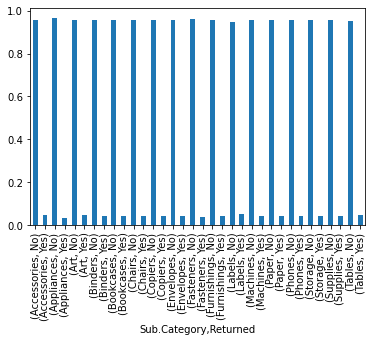

In [220]:
subseries = combined.groupby('Sub.Category')['Returned'].value_counts()/ combined.groupby('Sub.Category').size()
subseries.plot(kind = 'bar')

<AxesSubplot:xlabel='Category,Returned'>

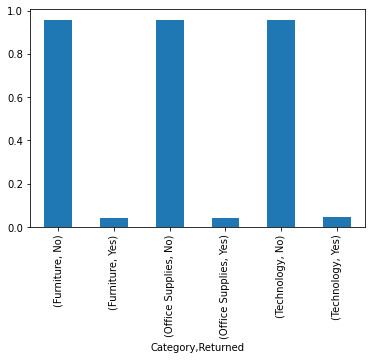

In [221]:
combined.groupby('Category')['Returned'].value_counts()
supplyseries = combined.groupby('Category')['Returned'].value_counts()/combined.groupby('Category')['Returned'].size()
supplyseries.plot(kind='bar')

In [222]:
season2=orders.groupby(['Month','Category']).sum().reset_index()
px.bar(season2, x = 'Month',y = 'Quantity',facet_col="Category")

In [223]:
seasondf = orders.groupby('Month').sum().reset_index()
px.histogram(seasondf, x= 'Month', y='Quantity', nbins = 20)

In [224]:
#Problem 4 step 1
combined.Returned = combined.Returned.map({'Yes': 1, 'No': 0})

In [225]:
#Problem 4 step 2
combined['Order.Date'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')
combined['Ship.Date'] = pd.to_datetime(orders['Ship.Date'], format='%m/%d/%y')
combined['Process.Time'] = combined['Ship.Date'] - combined['Order.Date']

In [226]:
#Problem 4 step 3
combined["N_Returns"] = combined[combined['Returned']==1].groupby('Product.ID').sum()[['Quantity']]

In [227]:
combined.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y,Process.Time,N_Returns
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,11,2014,0,NaN,2 days,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2,2014,0,NaN,2 days,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.1,919.97,915.49,Medium,10,2014,0,NaN,1 days,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.1,-96.54,910.16,Medium,1,2014,0,NaN,2 days,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.0,311.52,903.04,Critical,11,2014,0,NaN,1 days,NaN


In [228]:
combined["N_Returns"].fillna(0, inplace = True)

In [229]:
combined.drop(["Region_y"], axis = 1, inplace = True)

In [230]:
combined['Process.Time'] = (combined['Process.Time']).astype('timedelta64[D]').astype(int)

In [244]:
Y = combined[['Returned']]
X = combined[['Year','Month','Ship.Mode','Region_x','Segment','Sales','Quantity','Discount','Profit','Shipping.Cost','Order.Priority','Process.Time','N_Returns','Category','Sub.Category']]

In [245]:
combine_dummy = pd.get_dummies(data=X, columns=['Category', 'Sub.Category','Ship.Mode','Region_x','Segment','Order.Priority'],drop_first = True)

In [246]:
combine_dummy.shape

(51290, 57)

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(combine_dummy,Y, test_size=0.2, random_state=42, stratify = Y)

In [278]:
logit = linear_model.LogisticRegression(solver = 'liblinear', class_weight = "balanced")

In [279]:
logit.fit(X_train, Y_train)

C:\Users\Francesco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(class_weight='balanced', solver='liblinear')

In [280]:
logit.score(X_test, Y_test)

0.524956131799571

In [281]:
logit.score(X_train, Y_train)

0.5242493663482161

In [282]:
X_train.dtypes

Year                            int64
Month                           int64
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
Shipping.Cost                 float64
Process.Time                    int32
N_Returns                     float64
Category_Office Supplies        uint8
Category_Technology             uint8
Sub.Category_Appliances         uint8
Sub.Category_Art                uint8
Sub.Category_Binders            uint8
Sub.Category_Bookcases          uint8
Sub.Category_Chairs             uint8
Sub.Category_Copiers            uint8
Sub.Category_Envelopes          uint8
Sub.Category_Fasteners          uint8
Sub.Category_Furnishings        uint8
Sub.Category_Labels             uint8
Sub.Category_Machines           uint8
Sub.Category_Paper              uint8
Sub.Category_Phones             uint8
Sub.Category_Storage            uint8
Sub.Category_Supplies           uint8
Sub.Category

In [283]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for training_idx, validation_idx in skfold.split(X_train, Y_train):
    print("The churn rate of the training set of this fold is {}.".format(Y_train.iloc[training_idx].mean()))
    print("The churn rate of the validation set of this fold is {}.".format(Y_train.iloc[validation_idx].mean()))
    print("\n")

The churn rate of the training set of this fold is Returned    0.04329
dtype: float64.
The churn rate of the validation set of this fold is Returned    0.043256
dtype: float64.


The churn rate of the training set of this fold is Returned    0.04326
dtype: float64.
The churn rate of the validation set of this fold is Returned    0.043378
dtype: float64.


The churn rate of the training set of this fold is Returned    0.043289
dtype: float64.
The churn rate of the validation set of this fold is Returned    0.043261
dtype: float64.


The churn rate of the training set of this fold is Returned    0.043289
dtype: float64.
The churn rate of the validation set of this fold is Returned    0.043261
dtype: float64.


The churn rate of the training set of this fold is Returned    0.043289
dtype: float64.
The churn rate of the validation set of this fold is Returned    0.043261
dtype: float64.




In [284]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logit, X_train, Y_train, cv=skfold)
scores.mean()

C:\Users\Francesco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Francesco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Francesco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Francesco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Francesco\anaconda3\lib\site-packages\s

0.5221047695295631

In [285]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(Y_test, logit.predict(X_test))

array([[5162, 4652],
       [ 221,  223]], dtype=int64)